In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
dataset =pd.read_csv('Company_Data.csv')
dataset.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
label_encoder = preprocessing.LabelEncoder()
dataset['ShelveLoc']= label_encoder.fit_transform(dataset['ShelveLoc'])
dataset['Urban']= label_encoder.fit_transform(dataset['Urban'])
dataset['US']= label_encoder.fit_transform(dataset['US'])

In [4]:
x=dataset.iloc[:,0:10]
y=dataset['ShelveLoc']

In [5]:
x

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
0,9.50,138,73,11,276,120,0,42,17,1
1,11.22,111,48,16,260,83,1,65,10,1
2,10.06,113,35,10,269,80,2,59,12,1
3,7.40,117,100,4,466,97,2,55,14,1
4,4.15,141,64,3,340,128,0,38,13,1
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1
396,6.14,139,23,3,37,120,2,55,11,0
397,7.41,162,26,12,368,159,2,40,18,1
398,5.94,100,79,7,284,95,0,50,12,1


In [6]:
y

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int32

In [7]:
dataset['ShelveLoc'].unique()

array([0, 1, 2])

In [8]:
dataset.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [9]:
colnames = list(dataset.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=40)

In [11]:
#Building Decision Tree Classifier using Entropy Criteria
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

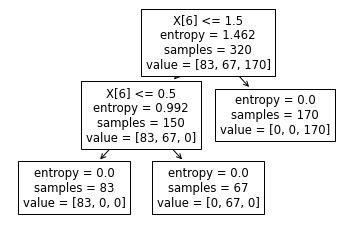

In [12]:
from sklearn import tree
tree.plot_tree(model);

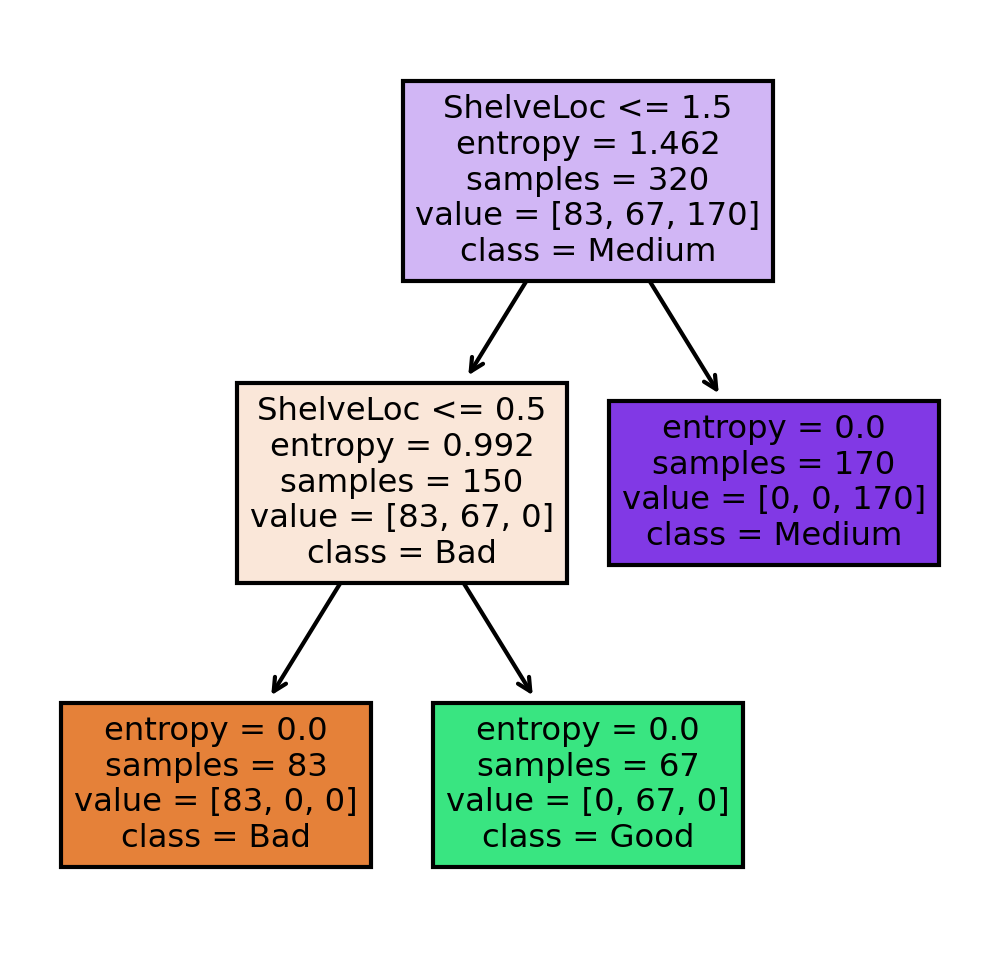

In [13]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban']
cn=['Bad', 'Good', 'Medium']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [15]:
#predicting on test data
preds =model.predict(x_test)
pd.Series(preds).value_counts()

2    49
1    18
0    13
dtype: int64

In [16]:
preds

array([1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 0, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 1,
       1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0])

In [17]:
pd.crosstab(y_test,preds)

col_0,0,1,2
ShelveLoc,,,
0,13,0,0
1,0,18,0
2,0,0,49


In [18]:
#Accuracy
np.mean(preds==y_test)

1.0

In [19]:
#building Decision  Tree Classifier(CART) using GINI Criteria
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [20]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [21]:
#prediction
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

In [22]:
#decision tree
from sklearn.tree import DecisionTreeRegressor

In [25]:
array = dataset.values
X = array[:,0:10]
Y= array[:,6]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [27]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [28]:
#Find the accuracy
model.score(X_test,y_test)

1.0